## Импорт необходимых библиотек

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from collections import Counter

## Загрузка json-файла из проекта и преобразование его в DataFrame

In [25]:
users_df = pd.read_json('../data/users.json')
users_df

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,О себе,Специализация,Приглашена,Пригласила на сайт
0,@kirillkirill000,0.0,0.0,Не участвует,2017-10-14,Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@eresik,27.0,0.0,Не участвует,2010-05-11,Захабренный,"Ростов-на-Дону, Ростовская обл., Россия",1980-01-07,"[.NET, 1C, 1С-Bitrix, Accessibility, Action Sc...",[Timeweb Cloud],NaN,NaN,NaN,NaN,NaN
2,@zamboga,2.0,0.0,Не участвует,2012-06-25,Захабренный,NaN,NaN,"[AR and VR, DIY, GTD, Habr, Car Gadgets, Astro...",NaN,NaN,NaN,NaN,NaN,NaN
3,@ParaPilot,3.0,0.0,Не участвует,2013-04-12,Захабренный,"Москва, Москва и Московская обл., Россия",1988-12-22,"[.NET, 3D printers, Ajax, API, AR and VR, ASP,...",NaN,NaN,NaN,NaN,NaN,NaN
4,@Ezik85,4.0,0.0,Не участвует,2011-10-10,Захабренный Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,"Казань, Татарстан, Россия",1985-06-11,"[DIY, Health, IOT, Server Administration, Syst...","[Туту.ру, VK]",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,@BJM,4.0,0.0,Не участвует,2018-02-27,Захабренный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8027,@maksasila,-3.0,0.0,Не участвует,2006-10-01,Отхабренный,"Meckenbeuren, Baden-Württemberg, Германия",NaN,"[Kubernetes, Antivirus protection, Virtualizat...",[Яндекс],NaN,NaN,NaN,NaN,NaN
8028,@Tempest,0.0,0.0,Не участвует,2011-10-17,NaN,NaN,NaN,"[*nix, Ajax, AR and VR, Assembler, C++, DIY, E...",[VK],NaN,NaN,NaN,NaN,NaN
8029,@speakingfish,15.0,0.0,Не участвует,2013-03-01,Захабренный,"Yerevan, Yerevan, Армения",1972-03-08,"[*nix, .NET, 1C, 1С-Bitrix, 3D printers, Acces...","[Flipper Devices Inc., Хабр Карьера]",NaN,NaN,NaN,NaN,NaN


## Посмотрим на количество непустых строк в столбцах

In [26]:
users_df.isna().sum()

tag                        1
karma                    192
rating                   404
В рейтинге               404
Зарегистрирован          404
Значки                  1884
Откуда                  4093
Дата рождения           5440
Состоит в хабах         2067
Подписан на компании    4720
Работает в              7614
О себе                  6832
Специализация           7299
Приглашена              7967
Пригласила на сайт      7997
dtype: int64

## Удалим столбцы с избыточной информацией (О себе, Приглашена, Пригласила на сайт)

In [27]:
users_df = users_df.drop(columns = ['О себе', 'Приглашена', 'Пригласила на сайт'])
users_df.head()

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,Специализация
0,@kirillkirill000,0.0,0.0,Не участвует,2017-10-14,Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,NaN,NaN,NaN,NaN,NaN,NaN
1,@eresik,27.0,0.0,Не участвует,2010-05-11,Захабренный,"Ростов-на-Дону, Ростовская обл., Россия",1980-01-07,"[.NET, 1C, 1С-Bitrix, Accessibility, Action Sc...",[Timeweb Cloud],NaN,NaN
2,@zamboga,2.0,0.0,Не участвует,2012-06-25,Захабренный,NaN,NaN,"[AR and VR, DIY, GTD, Habr, Car Gadgets, Astro...",NaN,NaN,NaN
3,@ParaPilot,3.0,0.0,Не участвует,2013-04-12,Захабренный,"Москва, Москва и Московская обл., Россия",1988-12-22,"[.NET, 3D printers, Ajax, API, AR and VR, ASP,...",NaN,NaN,NaN
4,@Ezik85,4.0,0.0,Не участвует,2011-10-10,Захабренный Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,"Казань, Татарстан, Россия",1985-06-11,"[DIY, Health, IOT, Server Administration, Syst...","[Туту.ру, VK]",NaN,NaN


## Добавим столбец с возрастом пользователя

In [28]:
today = date.today()
users_df['Возраст'] = (today.year - pd.to_datetime(users_df['Дата рождения']).dt.year)
users_df['Возраст'] = users_df['Возраст'].fillna(-1).astype(int)

users_df

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,Специализация,Возраст
0,@kirillkirill000,0.0,0.0,Не участвует,2017-10-14,Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,@eresik,27.0,0.0,Не участвует,2010-05-11,Захабренный,"Ростов-на-Дону, Ростовская обл., Россия",1980-01-07,"[.NET, 1C, 1С-Bitrix, Accessibility, Action Sc...",[Timeweb Cloud],NaN,NaN,44
2,@zamboga,2.0,0.0,Не участвует,2012-06-25,Захабренный,NaN,NaN,"[AR and VR, DIY, GTD, Habr, Car Gadgets, Astro...",NaN,NaN,NaN,-1
3,@ParaPilot,3.0,0.0,Не участвует,2013-04-12,Захабренный,"Москва, Москва и Московская обл., Россия",1988-12-22,"[.NET, 3D printers, Ajax, API, AR and VR, ASP,...",NaN,NaN,NaN,36
4,@Ezik85,4.0,0.0,Не участвует,2011-10-10,Захабренный Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,"Казань, Татарстан, Россия",1985-06-11,"[DIY, Health, IOT, Server Administration, Syst...","[Туту.ру, VK]",NaN,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,@BJM,4.0,0.0,Не участвует,2018-02-27,Захабренный,NaN,NaN,NaN,NaN,NaN,NaN,-1
8027,@maksasila,-3.0,0.0,Не участвует,2006-10-01,Отхабренный,"Meckenbeuren, Baden-Württemberg, Германия",NaN,"[Kubernetes, Antivirus protection, Virtualizat...",[Яндекс],NaN,NaN,-1
8028,@Tempest,0.0,0.0,Не участвует,2011-10-17,NaN,NaN,NaN,"[*nix, Ajax, AR and VR, Assembler, C++, DIY, E...",[VK],NaN,NaN,-1
8029,@speakingfish,15.0,0.0,Не участвует,2013-03-01,Захабренный,"Yerevan, Yerevan, Армения",1972-03-08,"[*nix, .NET, 1C, 1С-Bitrix, 3D printers, Acces...","[Flipper Devices Inc., Хабр Карьера]",NaN,NaN,52


 ## Посмотрим распределение участников сообщества по возрасту

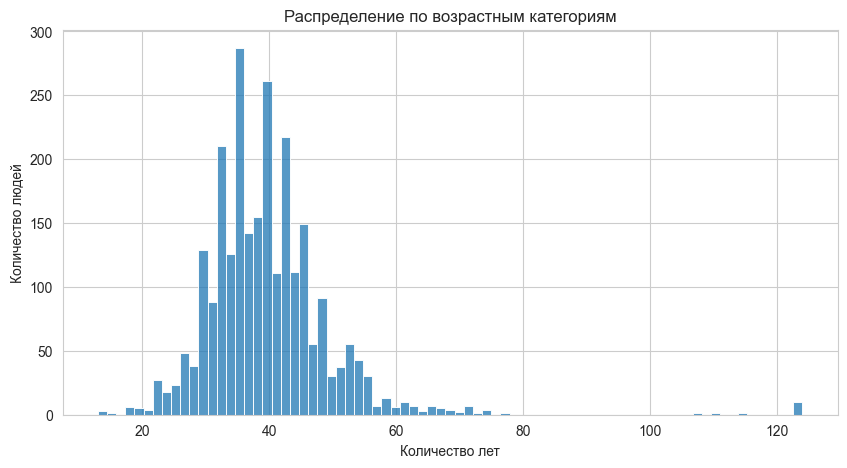

In [29]:
plt.figure(figsize=(10, 5))

sns.histplot(data=users_df[users_df["Возраст"] != -1], x="Возраст")

plt.title('Распределение по возрастным категориям')
plt.xlabel('Количество лет')
plt.ylabel('Количество людей')

plt.savefig("../visuals/users_age.png", format='png', dpi=150)

## Пострим простой граф для просмотра кармы пользователей

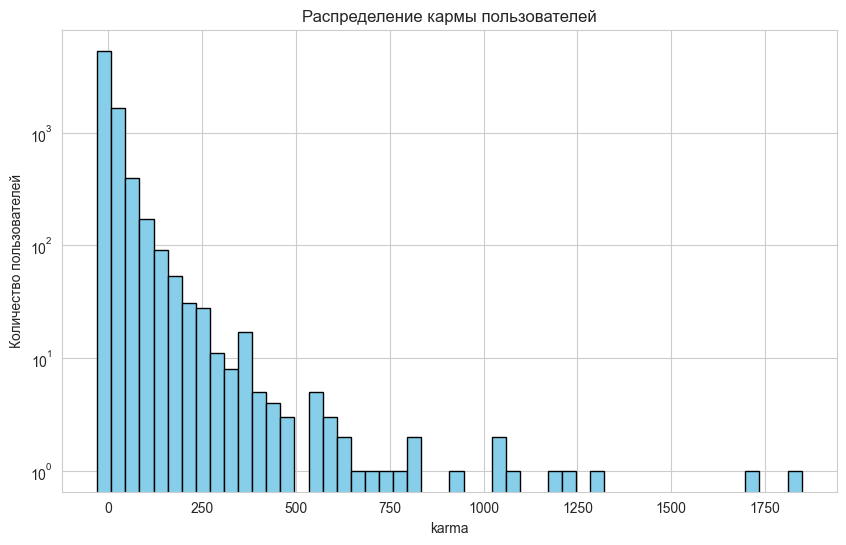

In [30]:
plt.figure(figsize=(10, 6))  
plt.hist(users_df['karma'], bins=50, color='skyblue', edgecolor='black')  
plt.title('Распределение кармы пользователей')  
plt.yscale('log')
plt.xlabel('karma')  
plt.ylabel('Количество пользователей')

plt.savefig("../visuals/users_karma.png", format='png', dpi=150)

## Построим граф для просмотра связности сообществ

In [31]:
users_df['Состоит в хабах'] = users_df['Состоит в хабах'].apply(lambda x: x if isinstance(x, list) else [])

In [32]:
G = nx.Graph()

for hubs in users_df['Состоит в хабах']:
    for hub1 in hubs:
        for hub2 in hubs:
            if hub1 != hub2:
                if G.has_edge(hub1, hub2):
                    G[hub1][hub2]['weight'] += 1
                else:
                    G.add_edge(hub1, hub2, weight=1)

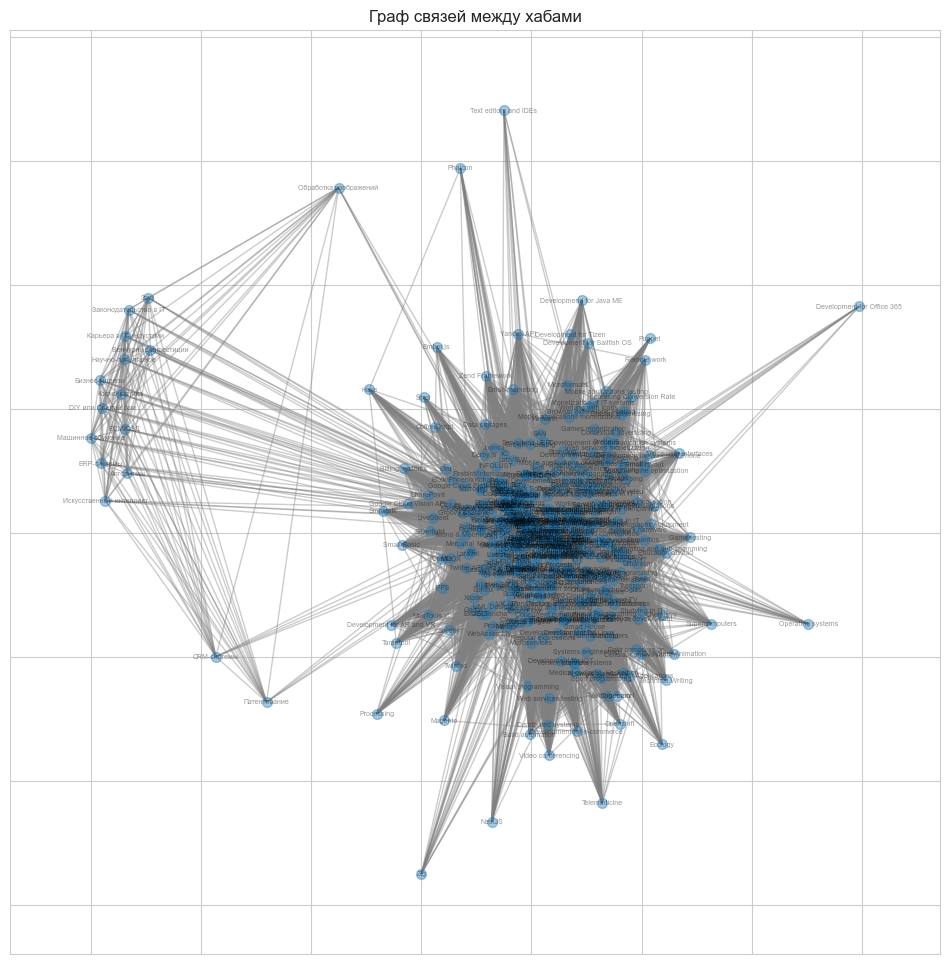

In [33]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx(G, pos, node_size=50, edge_color='gray', alpha=0.4, with_labels=True, font_size=5)
plt.title('Граф связей между хабами')

plt.savefig("../visuals/hub_graph.png", format='png', dpi=1000)

In [34]:
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Топ-5 хабов по центральности:")
for hub, value in sorted_centrality:
    print(f"{hub}: {value}")
    


Топ-5 хабов по центральности:
GTD: 0.9390519187358916
DIY: 0.9367945823927765
Habr: 0.927765237020316
Python: 0.9164785553047403
Big Data: 0.9119638826185101


## Построим граф для анализа значков пользователя

In [35]:
users_df['Значки'] = users_df['Значки'].str.split(' ')
desired_badges = ['Захабренный', 'Отхабренный', 'Комментатор', 'Переводчик', 'Старожил', 'Автор', 'Звезда', 'Легенда']
users_df['Фильтрованные значки'] = users_df['Значки'].apply(lambda badges_list: [badge for badge in badges_list if badge in desired_badges] if isinstance(badges_list, list) else [])

all_filtered_badges = [badge for sublist in users_df['Фильтрованные значки'] for badge in sublist]

badge_counts = Counter(all_filtered_badges)

badges_count_df = pd.DataFrame(badge_counts.items(), columns=['Значок', 'Количество']).sort_values(by='Количество', ascending=False)

badges_count_df


,Значок,Количество
0,Захабренный,4803
1,Отхабренный,1278
4,Старожил,737
3,Комментатор,83
2,Автор,75
5,Легенда,49
6,Переводчик,45
7,Звезда,22


In [36]:
users_df.explode("Значки")["Значки"].value_counts()

Значки
Захабренный      4803
Отхабренный      1278
▇▄▅               881
▇▅▄▅▅▄            881
Бета-тестер       828
                 ... 
виртуализации       1
Подкастер           1
секретов            1
Искатель            1
Kubernetes          1
Name: count, Length: 69, dtype: int64

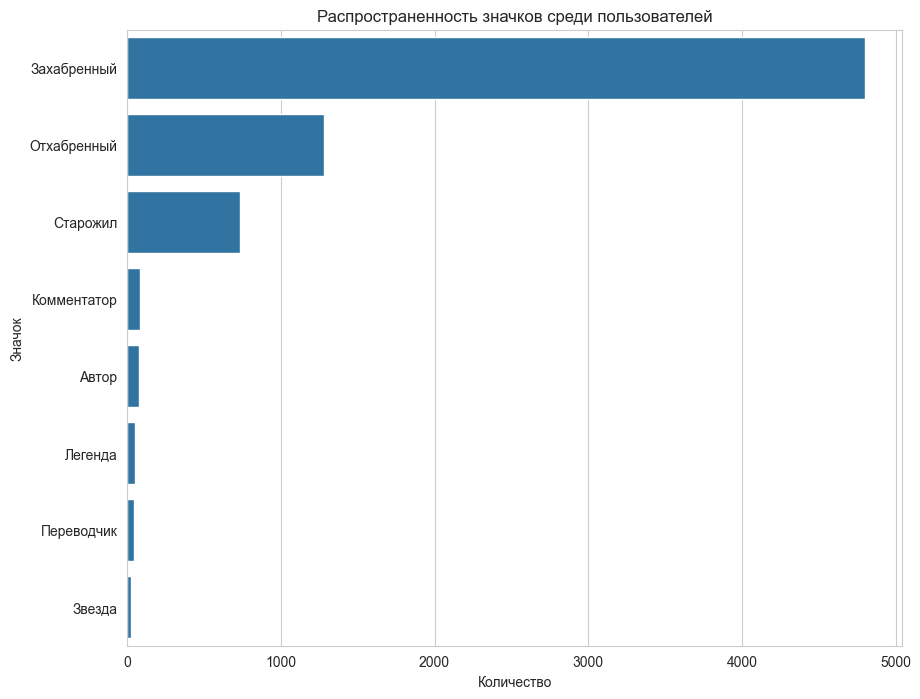

In [37]:
plt.figure(figsize=(10, 8))
sns.barplot(data=badges_count_df, x= 'Количество', y='Значок')
plt.title('Распространенность значков среди пользователей')
plt.xlabel('Количество')
plt.ylabel('Значок')

plt.savefig("../visuals/users_badges.png", format='png', dpi=150)

## Наиболее популярные комбинации значков

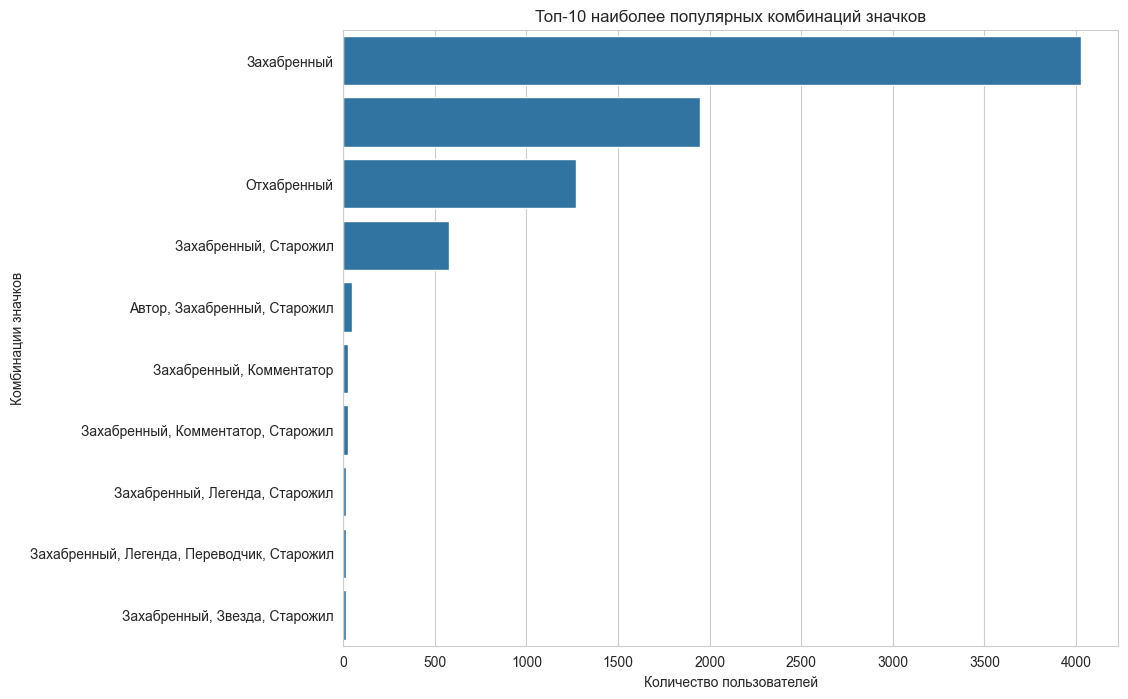

In [38]:
users_df['Фильтрованные значки'].value_counts()
users_df['Комбинация значков'] = users_df['Фильтрованные значки'].apply(lambda x: ', '.join(sorted(x)))

combinations_counts = users_df['Комбинация значков'].value_counts()

top_n = 10

top_combinations = combinations_counts.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_combinations.values, y=top_combinations.index)
plt.title('Топ-{} наиболее популярных комбинаций значков'.format(top_n))
plt.xlabel('Количество пользователей')
plt.ylabel('Комбинации значков')

plt.savefig("../visuals/badges_combination.png", format='png', dpi=150)

## Самые распостраненные черты среди участников хаба machine learning 

In [49]:
probable_values = dict()

placeholder = users_df.explode(["Значки"]).explode("Состоит в хабах").explode("Подписан на компании")

for tag in placeholder.columns:
    probable_values[tag] = placeholder[tag].dropna().mode()
    
pd.DataFrame(probable_values)

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,Специализация,Возраст,Фильтрованные значки,Комбинация значков
0,@Maccimo,0.0,0.0,Не участвует,2011-10-07,Захабренный,"Москва, Москва и Московская обл., Россия",2002-04-13,AR and VR,Яндекс,Selectel,{'Специалист': []},-1,[Захабренный],Захабренный
